In [6]:
#  주식데이터 - 전처리하기 (얠 먼저 한다)
import pandas as pd
import matplotlib.pyplot as plt

code = pd.read_csv('./data/corpgeneral.csv')
code

# 최신 데이터를 불러올 때, 인터넷 url로 불러온다.

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3883,툴젠,199800,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,...",2014-06-25,12월,"김영호, 이병화(각자 대표이사)",http://www.toolgen.com,서울특별시
3884,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
3885,피엔에이치테크,239890,기초 화학물질 제조업,"OLED완성체, OLED중간체, Pd촉매",2016-08-16,12월,현서용,http://www.phtech.co.kr,경기도
3886,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [7]:
code = code[['회사명','종목코드']]
code

,회사명,종목코드
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3883,툴젠,199800
3884,플럼라인생명과학,222670
3885,피엔에이치테크,239890
3886,한국미라클피플사,331660


In [9]:
code_result = code.rename(columns={'회사명': 'corp', '종목코드': 'code'})
code_result

,corp,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3883,툴젠,199800
3884,플럼라인생명과학,222670
3885,피엔에이치테크,239890
3886,한국미라클피플사,331660


In [15]:
# 주식데이터 - 그래프 그리기
corp_name = '카카오'
condition = "corp=='{}'".format(corp_name)
# corp=={} 열을 포맷팅 할건데, corp_name이 {}안에 들어간다 (corp_name이 corp=={}와 같은지)
# 조건에 맞게 찾아본다
kakao = code_result.query(condition)
kakao = kakao['code']
kakao_string = kakao.to_string(index=False)

# 문자열의 여백을 없애주는 함수
kakao_string.strip()

# 0을 포함하는 여섯자리를 만들어라
kakao_string = kakao_string.rjust(6,'0')
kakao_code = kakao_string + '.KS' # 코스피 (코스닥 : KQ)
kakao_code

'035720.KS'

In [16]:
conda install -c anaconda pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\MSI\anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa95532_1         2.9 MB
    pandas-datareader-0.9.0    |             py_0          72 KB  anaconda
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  anaconda/noarch::pandas-datareader-0.9.0-py_0

The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.1-py38haa244f~ --> pkgs/main::conda-4.10.1-py38haa95532_1




pandas-datareader-0. | 72 KB     |            |   0% 
pandas-datareader-0. | 72 KB     | ##2        |  22% 
pandas-datareader-0. | 72 KB     | ########## | 100% 


In [17]:
import pandas_datareader as pdr

# 야후에서 데이터를 가지고 오는 코드
kakao_stock_df = pdr.get_data_yahoo(kakao_code)
kakao_stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-22,18940.0,18660.0,18660.0,18840.0,697060.0,18732.789062
2016-06-23,18800.0,18580.0,18760.0,18640.0,934060.0,18533.927734
2016-06-24,18920.0,17660.0,18900.0,18240.0,3565790.0,18136.205078
2016-06-27,18360.0,17740.0,17740.0,18320.0,1611395.0,18215.750000
2016-06-28,18520.0,18180.0,18200.0,18240.0,1389495.0,18136.205078
...,...,...,...,...,...,...
2021-06-15,144500.0,140500.0,143500.0,144500.0,4950329.0,144500.000000
2021-06-16,146000.0,142500.0,144000.0,143000.0,4996272.0,143000.000000
2021-06-17,149500.0,140500.0,142000.0,148000.0,5408889.0,148000.000000


<AxesSubplot:xlabel='Date'>

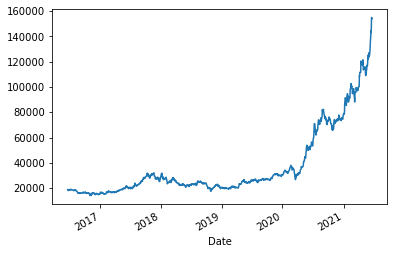

In [19]:
kakao_stock_df['Close'].plot()

In [68]:
# 주식 데이터 - 어느 정도의 상관관계를 가지고 있는지 분석
# 피어슨 상관계수를 알아야 한다 (-1 < rho < 1)

import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

code = pd.read_csv('./data/corpgeneral.csv', header = 0)
code = code[['회사명', '종목코드']]
code_result = code.rename(columns={'회사명':'corp', '종목코드':'code'})
code_result

# corp dict에 '카카오'가 있니? 함수 생성
def get_code(code_result, corp_name):
    condition = "corp=='{}'".format(corp_name)
    code = code_result.query(condition)['code'].to_string(index=False)
    code = code.strip()
    code = code.rjust(6,'0')
    code = code + '.KS'
    return code

In [69]:
samsung_code = get_code(code_result,'삼성전자')
samsung_code
cj_code = get_code(code_result,'CJ')
cj_code

'001040.KS'

In [71]:
# 데이터 상관관계 분석
companies = ['카카오', 'NAVER', '삼성전자', 'LG전자']

# 데이터의 시작점 및 끝점
start = datetime(2019,1,1)
end = datetime(2019,12,31)

stocks_of_date = pd.DataFrame({'Date':pd.date_range(start=start, end=end)})
stocks_of_date

for company in companies:
    company_code = get_code(code_result, company)
    # yahoo에서 데이터를 가져온다 
    stocks_df = pdr.get_data_yahoo(company_code, start, end)
    # dataframe을 만들어서 join한다     
    stocks_of_companies = stocks_of_date.join(pd.DataFrame(stocks_df['Close']).rename(columns={'Close':company}), on='Date')

stocks_of_companies
    # corr_data = stocks_of_companies.corr()
# corr_data

,Date,LG전자
0,2019-01-01,NaN
1,2019-01-02,62800.0
2,2019-01-03,62900.0
3,2019-01-04,62200.0
4,2019-01-05,NaN
...,...,...
360,2019-12-27,71800.0
361,2019-12-28,NaN
362,2019-12-29,NaN
363,2019-12-30,72100.0


In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

# header : 어떤 데이터인지 설명해주는 것
code = pd.read_csv('./data/corpgeneral.csv', header = 0)
code

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3883,툴젠,199800,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,...",2014-06-25,12월,"김영호, 이병화(각자 대표이사)",http://www.toolgen.com,서울특별시
3884,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
3885,피엔에이치테크,239890,기초 화학물질 제조업,"OLED완성체, OLED중간체, Pd촉매",2016-08-16,12월,현서용,http://www.phtech.co.kr,경기도
3886,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [3]:
code = code[['회사명', '종목코드']]
code

,회사명,종목코드
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3883,툴젠,199800
3884,플럼라인생명과학,222670
3885,피엔에이치테크,239890
3886,한국미라클피플사,331660


In [4]:
code_result = code.rename(columns={'회사명':'corp', '종목코드':'code'})
code_result

,corp,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3883,툴젠,199800
3884,플럼라인생명과학,222670
3885,피엔에이치테크,239890
3886,한국미라클피플사,331660


In [8]:
def get_code(code_result, corp_name):
    condition = "corp=='{}'".format(corp_name)
    # query(조건)[코드를 원한다].문자열로 바꿔준다
    code = code_result.query(condition)['code'].to_string(index=False)
    # 공백제거
    code = code.strip()
    # 6자리 숫자로 표현
    code = code.rjust(6, '0')
    # 코스피
    code = code + '.KS'
    return code

samsung_code = get_code(code_result, "삼성전자")
samsung_code
cj_code = get_code(code_result,"CJ")
cj_code

'001040.KS'

In [9]:
companies = ['카카오', 'NAVER', '삼성전자', 'LG전자', 'CJ', '한화', '현대모비스', '현대자동차']

start = datetime(2019,1,1)
end = datetime(2020,12,31)

stocks_of_companies = pd.DataFrame({'Date':pd.date_range(start=start, end=end)})
stocks_of_companies

,Date
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
726,2020-12-27
727,2020-12-28
728,2020-12-29
729,2020-12-30


In [10]:
for company in companies:
    company_code = get_code(code_result, company)
    stock_df = pdr.get_data_yahoo(company_code, start, end)
    stocks_of_companies = stocks_of_companies.join(pd.DataFrame(stock_df['Close']).rename(columns={'Close':company}), on='Date')
    

In [11]:
stocks_of_companies

,Date,카카오,NAVER,삼성전자,LG전자,CJ,한화,현대모비스,현대자동차
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,20400.0,118000.0,38750.0,62800.0,116000.0,31000.0,185000.0,114000.0
2,2019-01-03,20500.0,122000.0,37600.0,62900.0,118500.0,29950.0,192000.0,116500.0
3,2019-01-04,20700.0,125500.0,37450.0,62200.0,119500.0,29900.0,199500.0,119500.0
4,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
726,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,2020-12-28,74600.0,281000.0,78700.0,124500.0,89300.0,27900.0,250000.0,189500.0
728,2020-12-29,76900.0,283000.0,78300.0,131500.0,91100.0,27850.0,251000.0,190500.0
729,2020-12-30,77900.0,292500.0,81000.0,135000.0,92100.0,28300.0,255500.0,192000.0


In [12]:
# x축에 따른 y축의 변화 (상관관계)
corr_data = stocks_of_companies.corr()
corr_data

,카카오,NAVER,삼성전자,LG전자,CJ,한화,현대모비스,현대자동차
카카오,1.000000,0.976313,0.773768,0.589510,-0.497287,-0.122771,0.071025,0.590652
NAVER,0.976313,1.000000,0.764979,0.487736,-0.520866,-0.172859,0.042231,0.481471
삼성전자,0.773768,0.764979,1.000000,0.595100,-0.441349,-0.131565,0.346211,0.581201
LG전자,0.589510,0.487736,0.595100,1.000000,0.126341,0.508608,0.516592,0.889730
CJ,-0.497287,-0.520866,-0.441349,0.126341,1.000000,0.809185,0.088562,-0.028021
한화,-0.122771,-0.172859,-0.131565,0.508608,0.809185,1.000000,0.369175,0.442920
현대모비스,0.071025,0.042231,0.346211,0.516592,0.088562,0.369175,1.000000,0.603271
현대자동차,0.590652,0.481471,0.581201,0.889730,-0.028021,0.442920,0.603271,1.000000


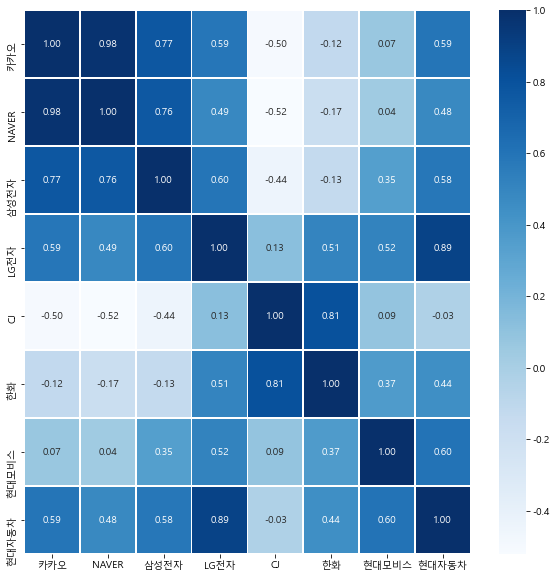

In [15]:
# 그래프 그리기

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
# 그림 그릴 때, - 기호 없애기
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show() 

In [12]:
# 보고서를 만들어서 어떻게 공유할 지 만들어보자
# 데이터스튜디오 - python으로 만들 수 있음
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from datetime import datetime

code = pd.read_csv('./data/corpgeneral.csv', header=0)
code = code[['회사명', '종목코드']]

# 컬럼명 바꾸기
code_result = code.rename(columns={'회사명': 'corp', '종목코드': 'code'})
# 종목 코드 6자리만들기
code_result.code = code_result.code.map('{:06d}'.format)

def get_code(code_result, corp_name):
    condition = "corp=='{}'".format(corp_name)
    code = code_result.query(condition)['code'].to_string(index=False)
    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

companies = ['삼성전자', 'LG전자', '카카오', 'NAVER', 'CJ', '한화', '현대자동차', '기아자동차']
start = datetime(2019,1,1)
end = datetime(2020,9,10)
stocks_of_companies = pd.DataFrame({'Date': pd.date_range(start=start, end=end)})

for company in companies:
    company_code = get_code(code_result, company) + '.KS'
    stock_df = pdr.get_data_yahoo(company_code, start, end)
    stocks_of_companies = stocks_of_companies.join(pd.DataFrame(stock_df['Close'].pct_change()).rename(columns={'Close':company}), on='Date')

    plt.rcParams['font.family'] = 'Malgun Gothic'
# 그림 그릴 때, - 기호 없애기
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_data, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show() 
#     데이터 셋 만드는 방법
stocks_of_companies.dropna()
stocks_of_companies.to_csv('./stock_change.csv',sep=',', na_rep='NaN',index = False)

NameError: name 'corr_data' is not defined

<Figure size 720x720 with 0 Axes>

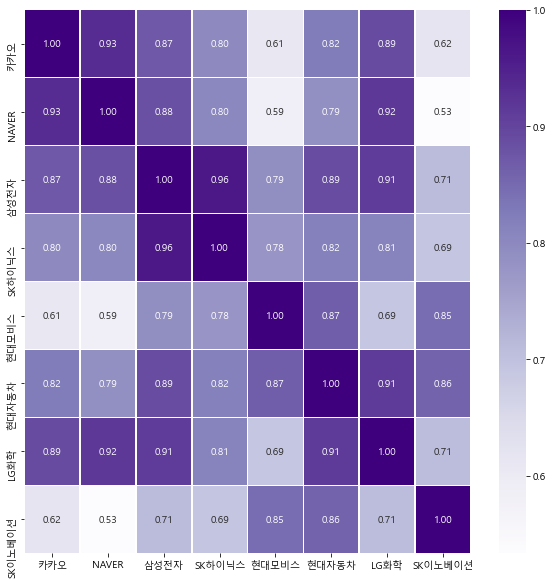

In [22]:
# 분석한 보고서의 URL을 제출하기!
# 르탄이 또는 친구에게 자랑해보세요~
# 내가 얻고 싶은 인사이트를 그려서 데이터스튜디오로 ㄱㄱ

import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# header : 어떤 데이터인지 설명해주는 것
code = pd.read_csv('./data/corpgeneral.csv', header = 0)
code = code[['회사명', '종목코드']]
code_result = code.rename(columns={'회사명':'corp', '종목코드':'code'})

def get_code(code_result, corp_name):
    condition = "corp=='{}'".format(corp_name)
    # query(조건)[코드를 원한다].문자열로 바꿔준다
    code = code_result.query(condition)['code'].to_string(index=False)
    # 공백제거
    code = code.strip()
    # 6자리 숫자로 표현
    code = code.rjust(6, '0')
    # 코스피
    code = code + '.KS'
    return code

companies = ['카카오', 'NAVER', '삼성전자', 'SK하이닉스', '현대모비스', '현대자동차', 'LG화학', 'SK이노베이션']

start = datetime(2019,1,1)
end = datetime(2021,6,23)

stocks_of_companies = pd.DataFrame({'Date':pd.date_range(start=start, end=end)})

for company in companies:
    company_code = get_code(code_result, company)
    stock_df = pdr.get_data_yahoo(company_code, start, end)
    stocks_of_companies = stocks_of_companies.join(pd.DataFrame(stock_df['Close']).rename(columns={'Close':company}), on='Date')

# DataSet
stocks_of_companies.dropna()
stocks_of_companies.to_csv('./stocks.csv',sep=',', na_rep='NaN',index = False)

# Graph
corr_data = stocks_of_companies.corr()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_data, annot=True, fmt='.2f', linewidths=.5, cmap='Purples')
plt.show()